## *GDP: Gross Domestic Product*


### Indice

0. Packages
1. EDA
2. Cluster
3. Hechos que diferencian a cada grupo
4. Crecimientos

In [12]:
#Packages

import sys

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

##### *1.- EDA*

Variables:
* *geo* : Geopolitical entity

* *na_item* : National account indicator. 
    * [B1GQ]: Gross domestic product at market prices
    
* *LAST_UPDATE* : Last refresh date

* *freq* : Time frequency for data refresh

* *unit* : Unit of measure
    * [CLV10_EUR_HAB]: Chain linked volumes (2010), euro per capita
    * [CLV_PCH_PRE_HAB]: Chain linked volumes, percentage change on previous period, per capita

* *TIME_PERIOD* : Period for observed values

* *OBS_VALUES* : Measure/Observed

In [13]:
data = pd.read_csv("../data/raw/sdg_08_10_linear.csv", delimiter=',')
country = pd.read_csv("https://gist.githubusercontent.com/brenes/1095110/raw/4422fd7ba3a388f31a9a017757e21e5df23c5916/paises.csv")

country.to_csv("../data/external/countries.csv", index=False)

In [14]:
#Limpieza y transformación de variables

data['TIME_PERIOD'] = pd.to_datetime(data['TIME_PERIOD'],format='%Y')
data = data[data['unit']=="CLV10_EUR_HAB"]
data = data[['geo','TIME_PERIOD','OBS_VALUE']]

data = pd.merge(data,country[["name","iso"]], left_on = "geo", right_on="iso").drop(columns=['iso'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   geo          659 non-null    object        
 1   TIME_PERIOD  659 non-null    datetime64[ns]
 2   OBS_VALUE    657 non-null    float64       
 3   name         659 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 20.7+ KB


In [15]:
#Generamos un dataframe distinto en función del year

years = data['TIME_PERIOD'].dt.year.unique()

data_by_year = {}

for year in years:
    data_by_year[year] = data[data['TIME_PERIOD'].dt.year == year]

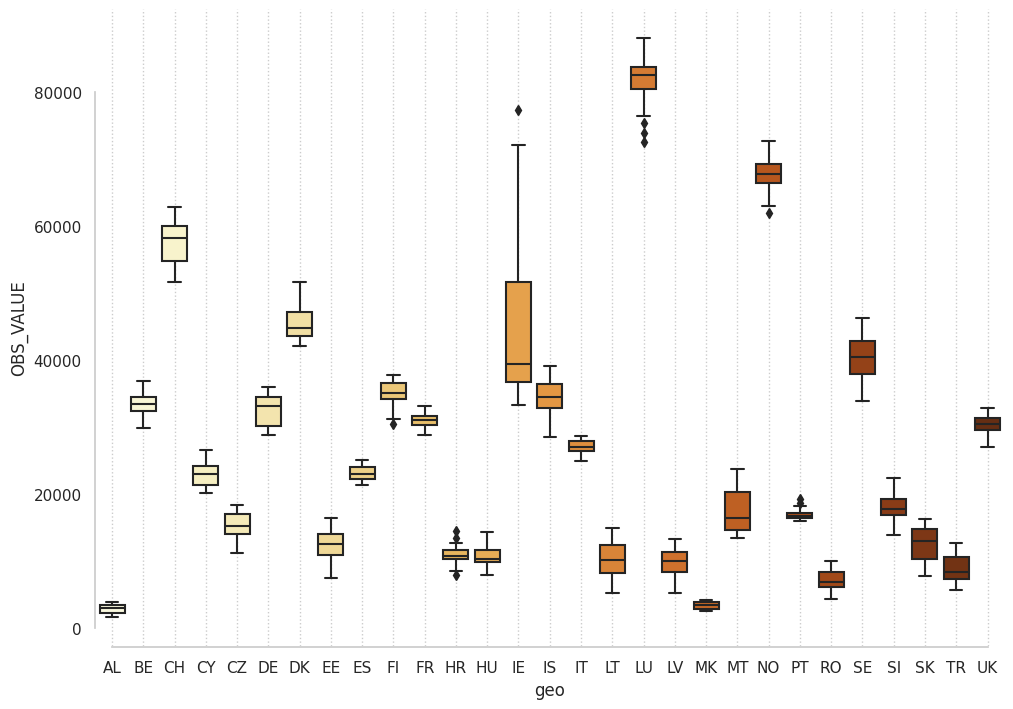

In [16]:
fig,ax = plt.subplots()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid",{"grid.linestyle":":"})

sns.boxplot(x=data['geo'],
            y=data['OBS_VALUE'],
            data = data['OBS_VALUE'],
            palette = "YlOrBr",
            ax=ax
            )

sns.despine(offset=1,trim=True)

ax.yaxis.grid(False)
ax.xaxis.grid(True)


In [17]:
data = data.groupby('TIME_PERIOD').agg({"OBS_VALUE":"mean"})
data = data.rename(columns={"OBS_VALUE":"Mean_GDP"})
data = data.rename_axis(index={"TIME_PERIOD": "year"})


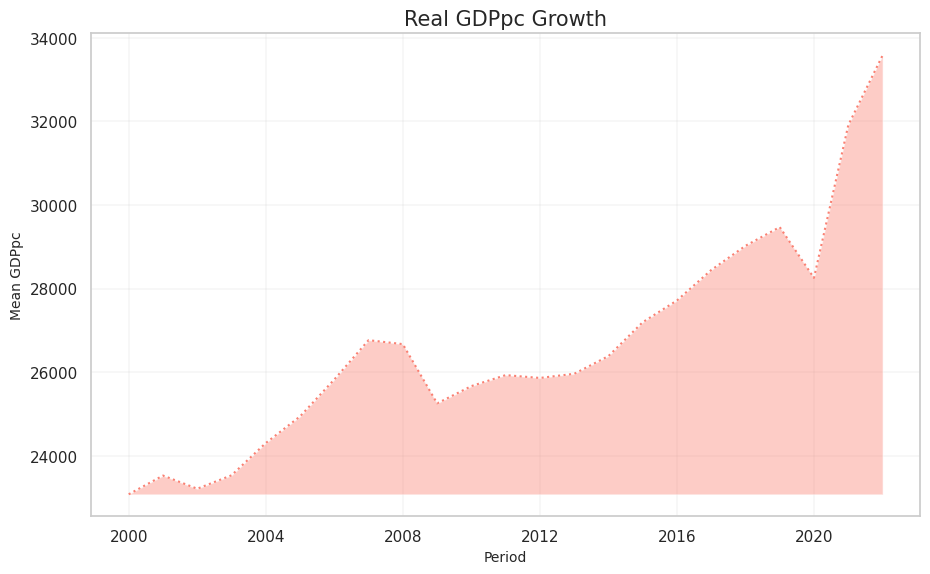

In [93]:
var = np.mean(data['Mean_GDP'])
var1 = np.array(np.log(data['Mean_GDP']))



plt.plot(data.index, data['Mean_GDP'],
         linestyle='dotted'
)

plt.fill_between(data.index,data['Mean_GDP'],min(data['Mean_GDP']),
                 alpha=0.4
)

#style
plt.title("Real GDPpc Growth", fontdict={'size':'15'})
plt.xlabel("Period",fontdict={'size':'10'})
plt.ylabel("Mean GDPpc",fontdict={'size':'10'})
plt.grid(linewidth=.2)


plt.show()


